In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.1
percent = 30
steps = 50

In [3]:
base = '/home/god/Documentos/tcc/datasets/NOAA.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt = handshake2.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

/home/god/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [6]:
acc_percent, f1_per, mcc_per = metrics.makeBatches(l_stream, predicted, len(stream), steps)
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, steps, f1_type = 'macro')

acc_percentScargc, f1_S, mcc_S = metrics.makeBatches(l_stream, predictedS, len(stream), steps)
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, steps, f1_type = 'macro')

/home/god/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/god/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Tempo de Execução:  18.60380268096924
memory peak:  139672
Acc:  0.6325089315807212
Macro-F1:  0.6262236125917239
MCC:  0.33239909561929
Desvio Padrão:  0.037308195656067515
Numero de atualizações:  60


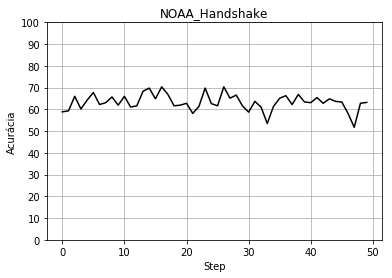

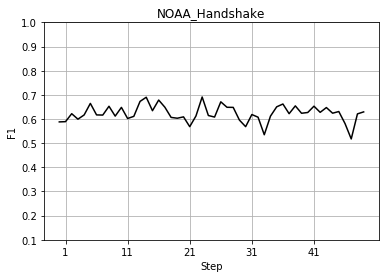

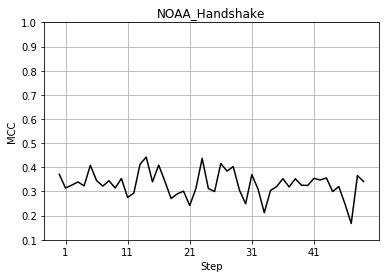

Tempo de Execução:  11.43492603302002
memory peak:  150644
Acc:  0.6868550724637682
Macro-F1:  0.4147705712931528
MCC:  0.04129842271706247
Desvio Padrão:  0.046133732592369074
Numero de atualizações:  2


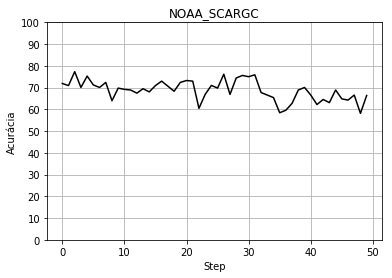

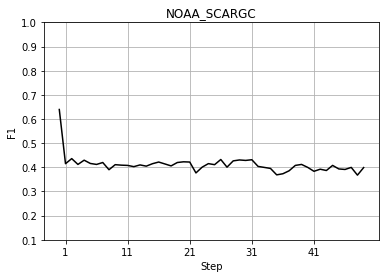

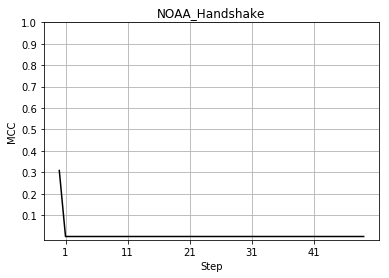

/home/god/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


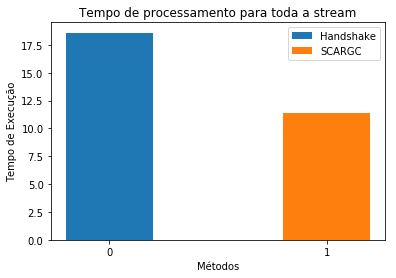

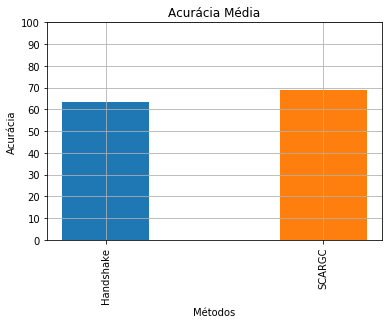

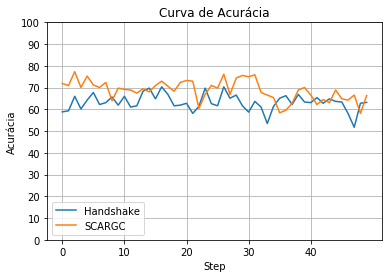

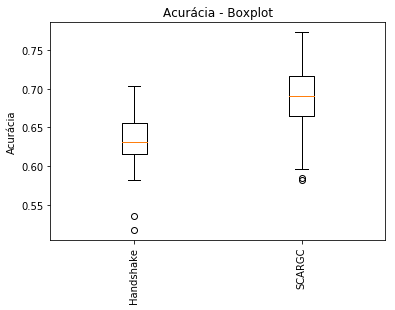

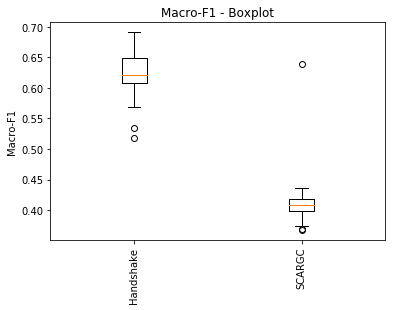

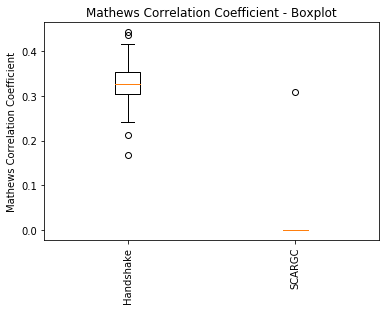

In [7]:
print('Tempo de Execução: ', tempo)
print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
plots.plotAcc(acc_percent, steps, 'NOAA_Handshake')
plots.plotF1(f1_per, steps, 'NOAA_Handshake')
plots.plotMCC(mcc_per, steps, 'NOAA_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, steps, 'NOAA_SCARGC')
plots.plotF1(f1_S, steps, 'NOAA_SCARGC')
plots.plotMCC(mcc_S, steps, 'NOAA_Handshake')

listTime = [tempo, tempoS]
listAcc = [score, scoreS]
listMethod = ['Handshake', 'SCARGC']
matrixAcc = [acc_percent[0], acc_percentScargc[0]]
matrixF1 = [f1_per[0], f1_S[0]]
matrixMcc = [mcc_per[0], mcc_S[0]]

plots.plotTime(listTime, listMethod)
plots.plotAverageAcc(listAcc, listMethod)
plots.plotAccuracyCurves(matrixAcc, listMethod, steps)
plots.plotBoxplot('acc', matrixAcc, listMethod)
plots.plotBoxplot('f1', matrixF1, listMethod)
plots.plotBoxplot('mcc', matrixMcc, listMethod)

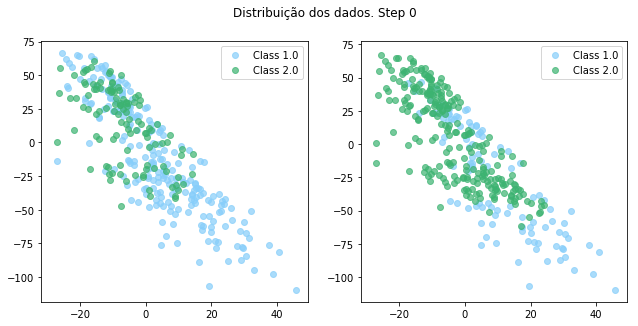

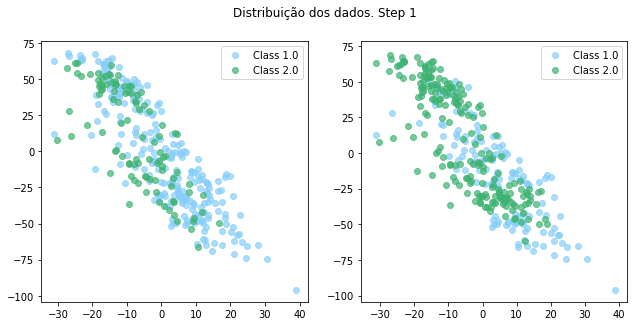

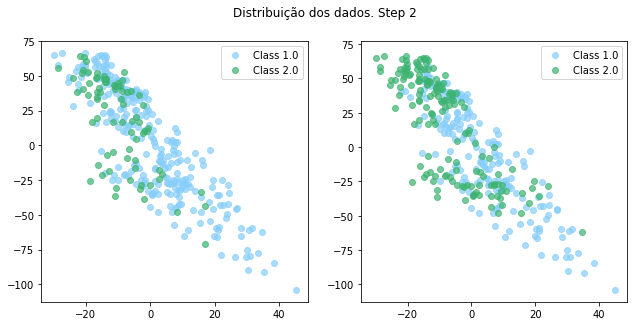

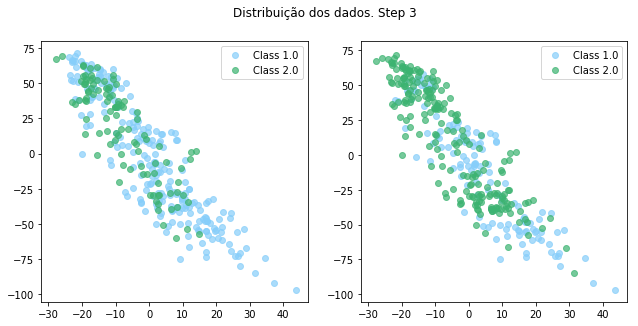

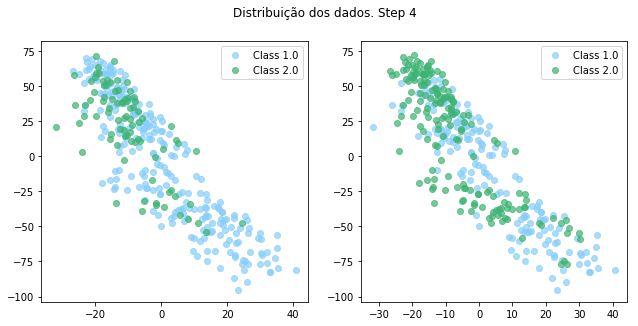

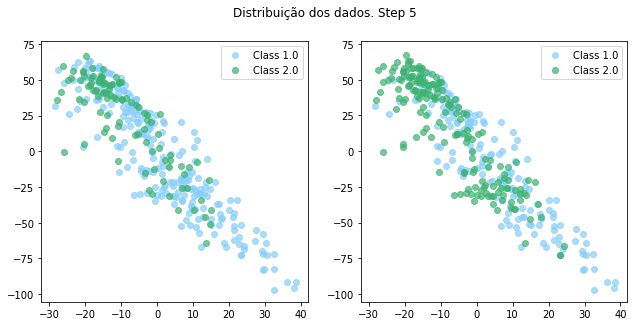

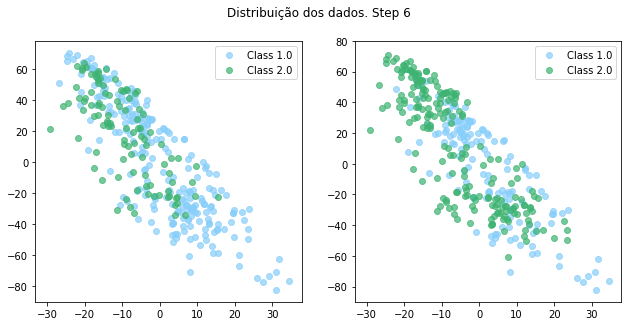

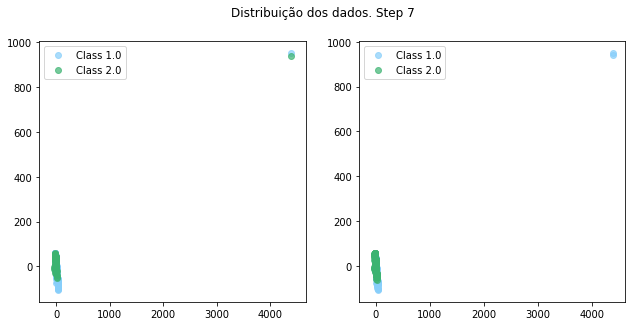

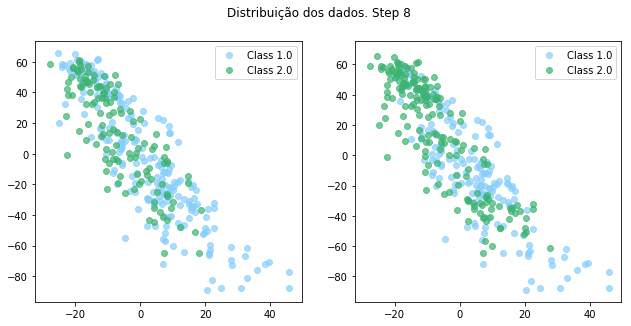

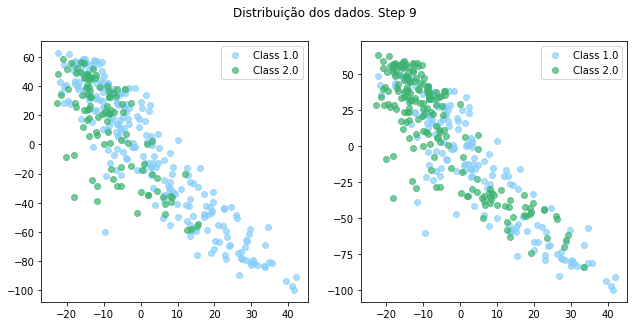

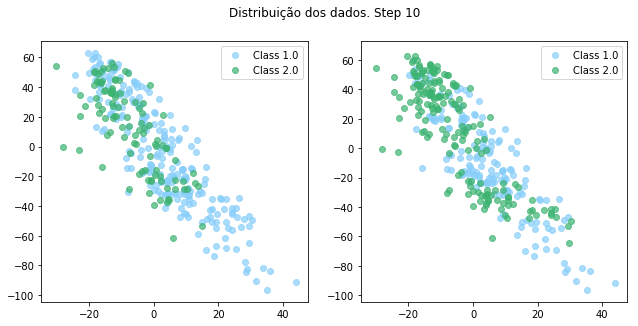

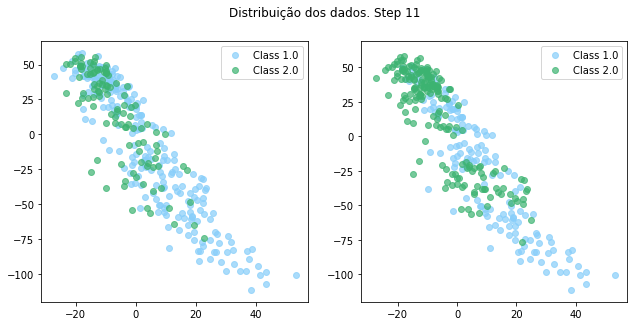

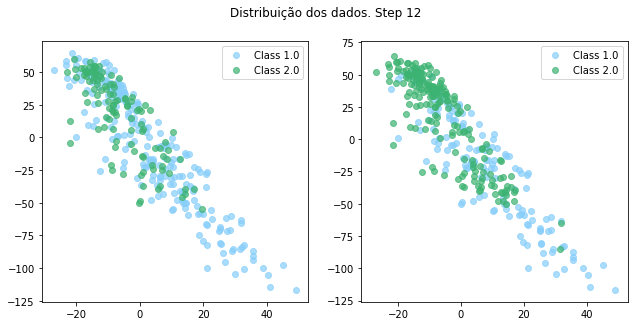

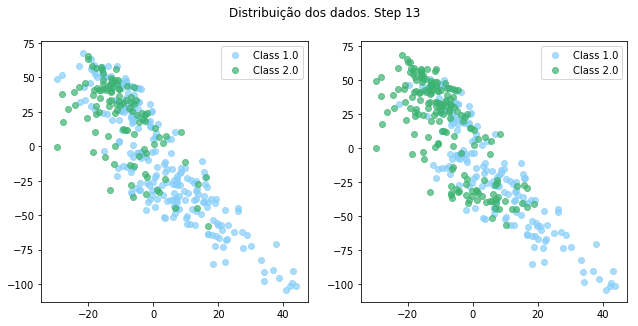

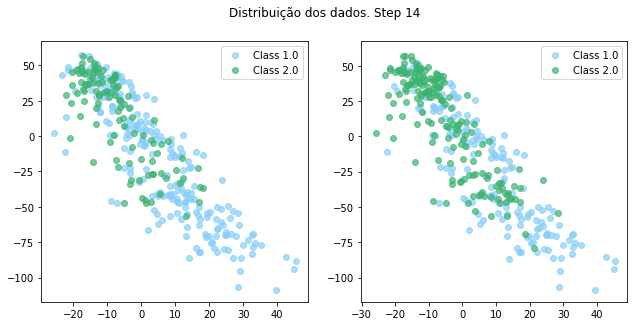

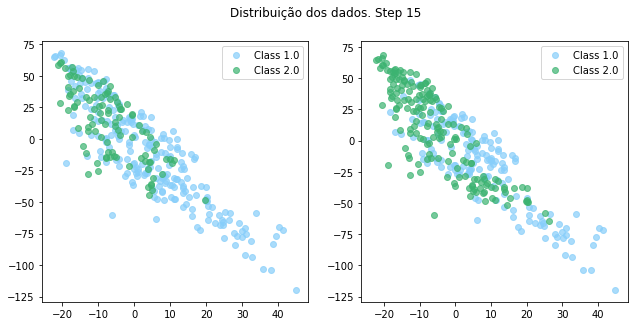

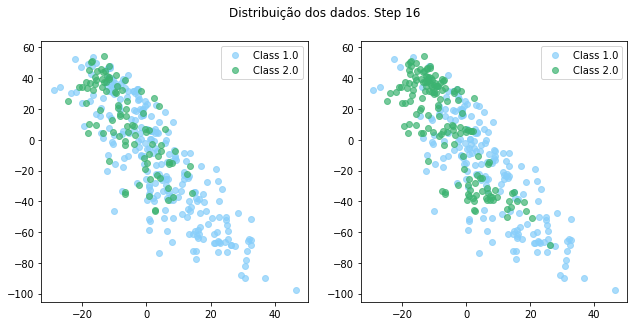

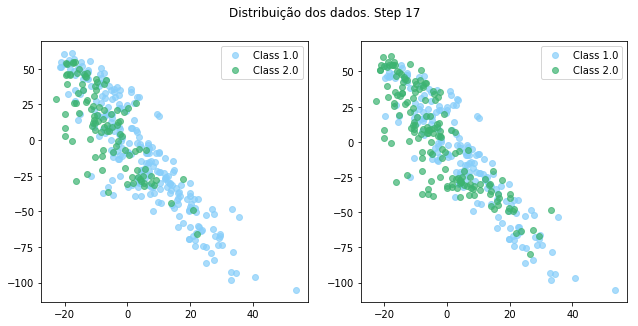

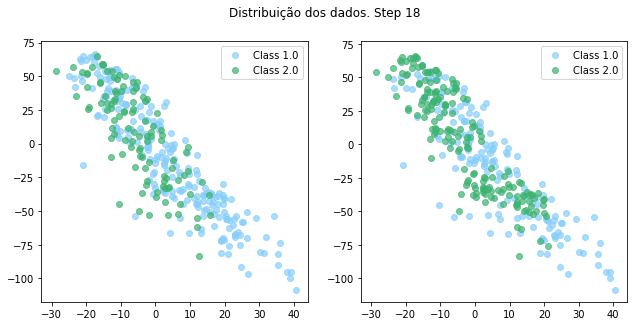

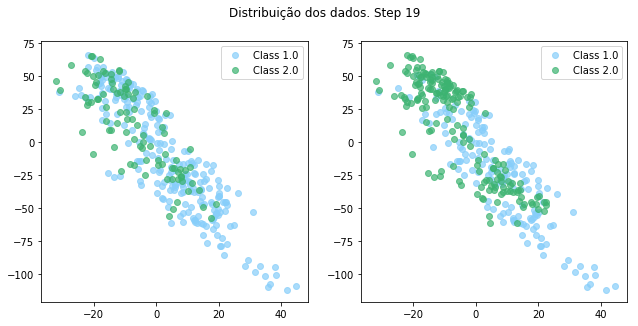

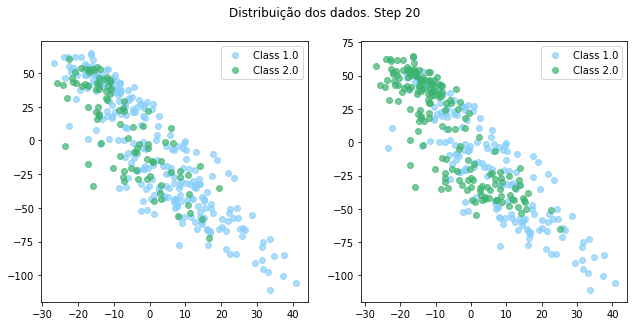

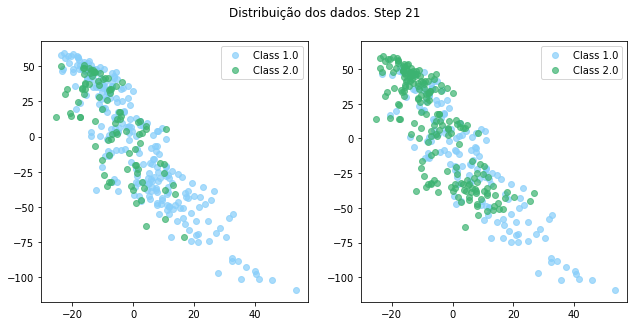

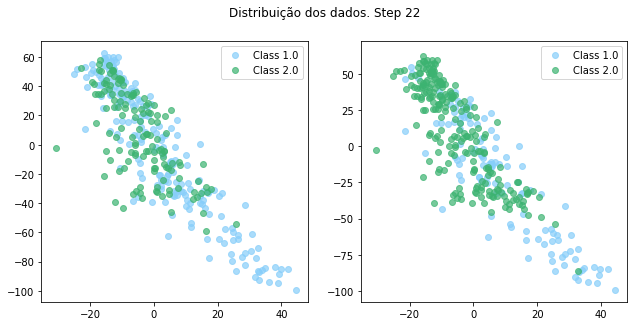

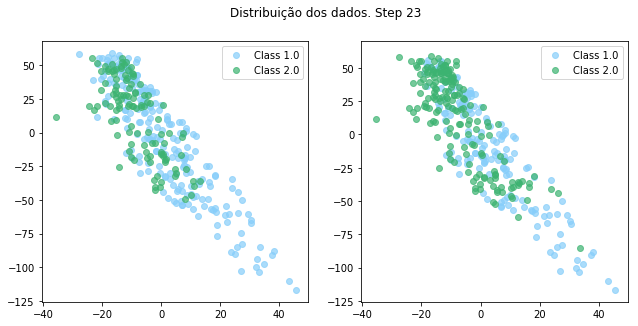

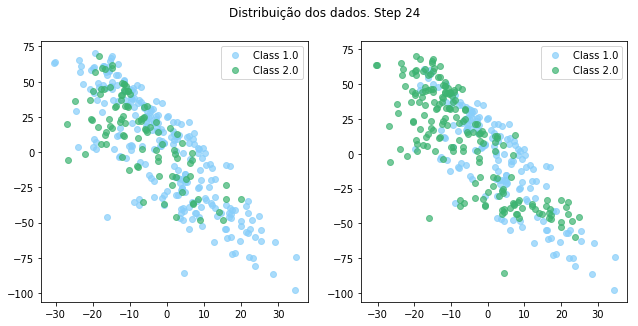

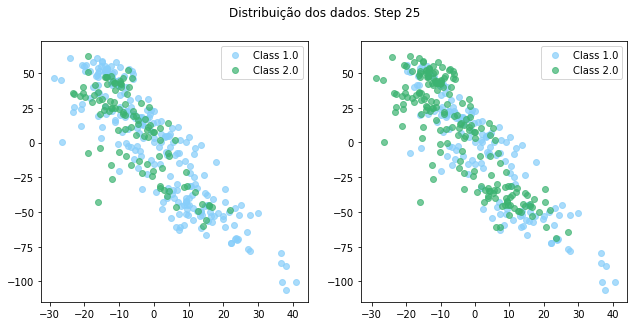

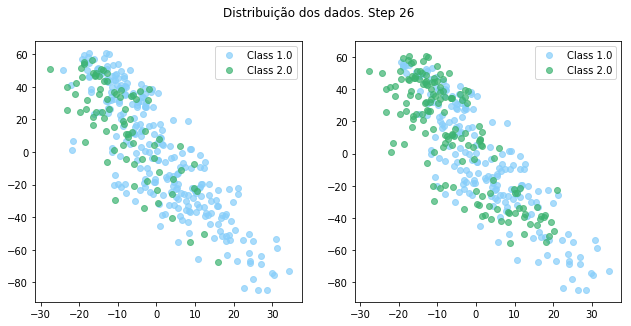

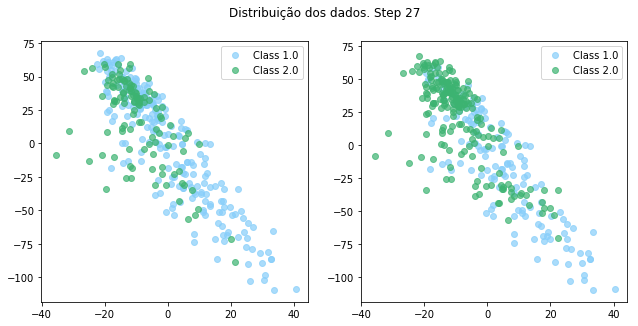

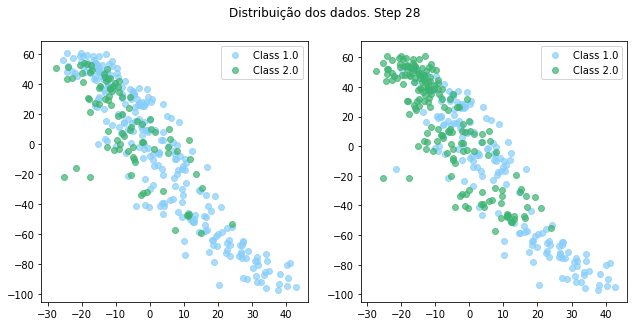

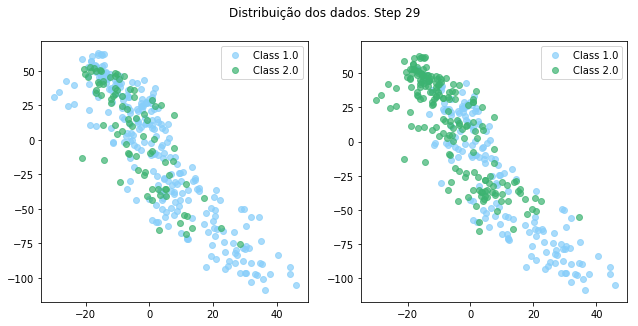

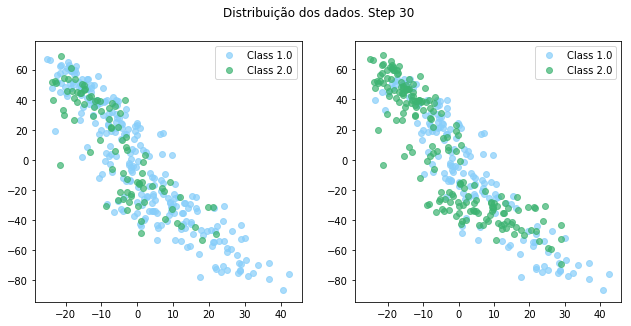

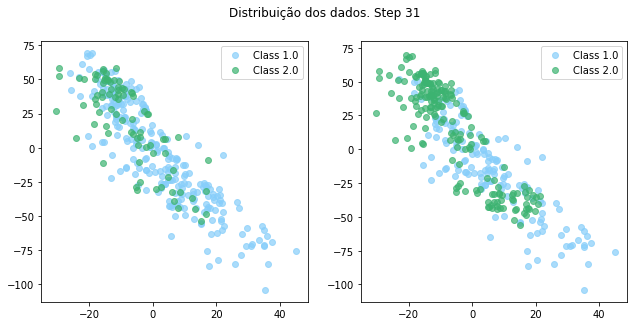

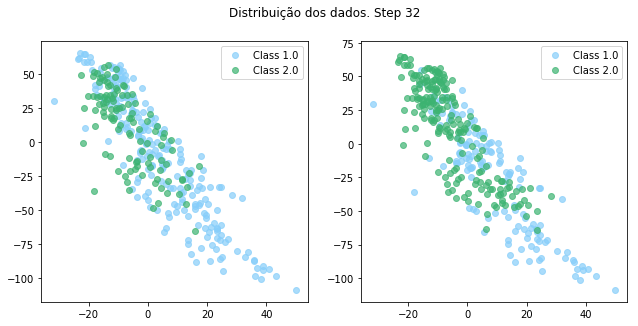

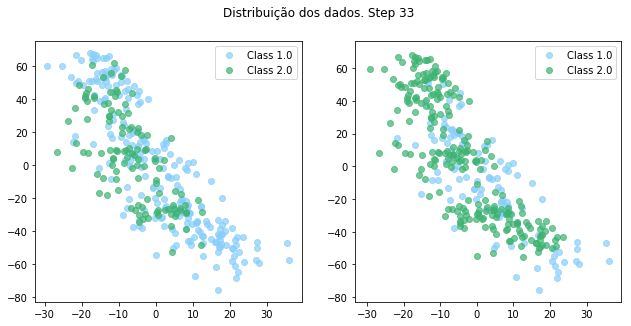

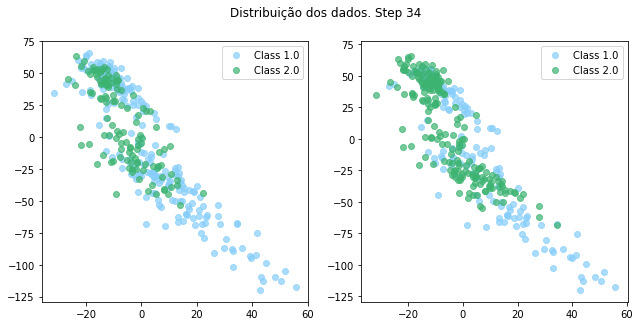

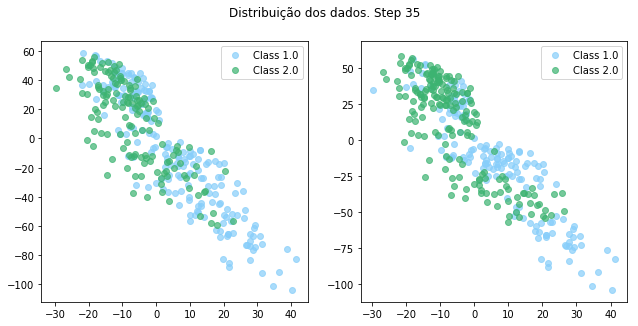

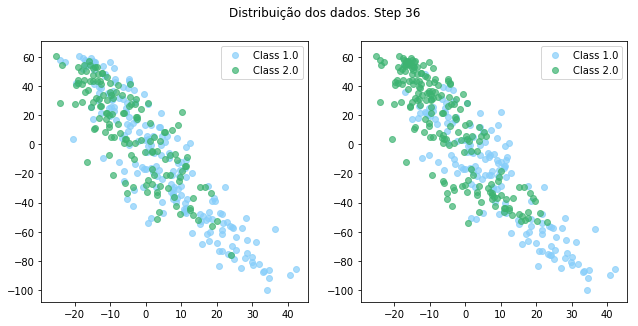

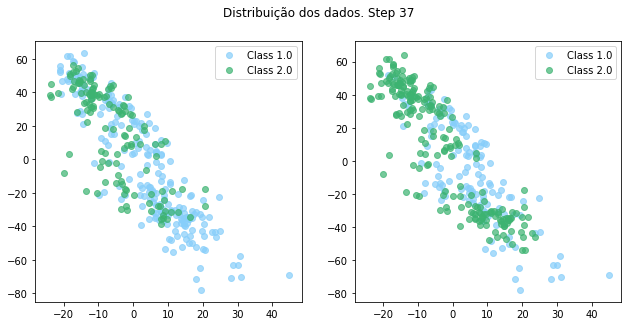

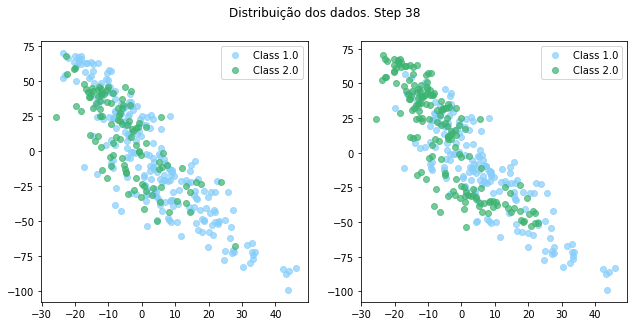

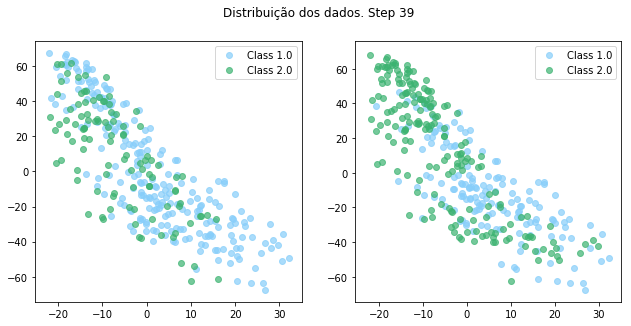

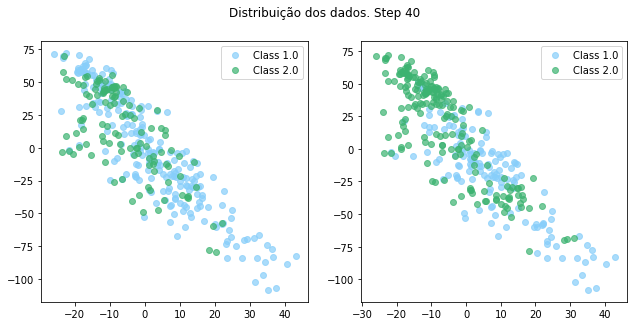

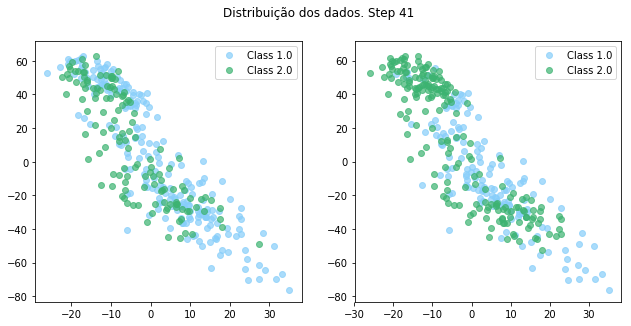

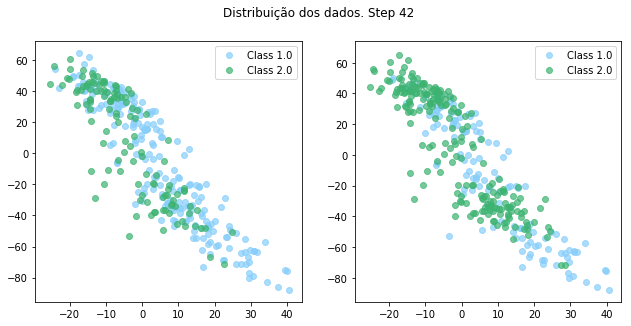

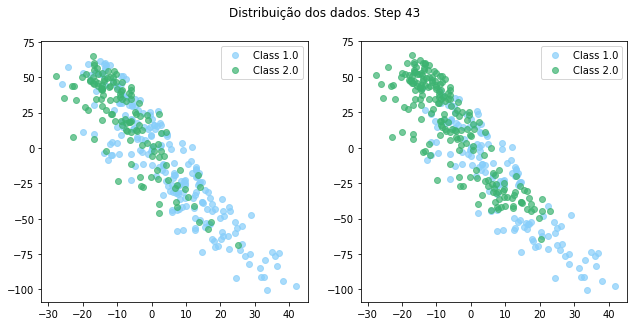

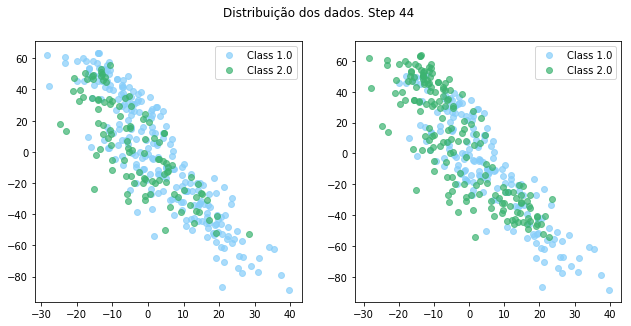

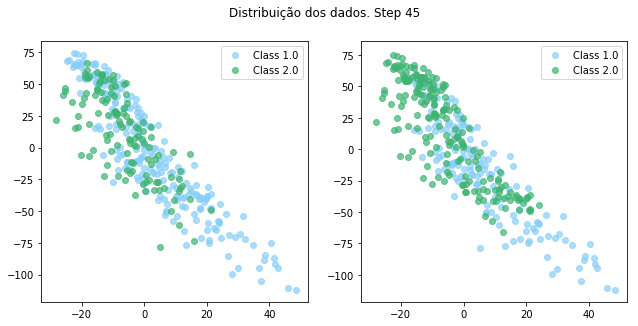

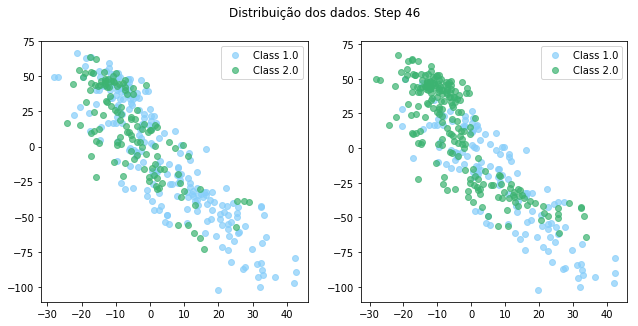

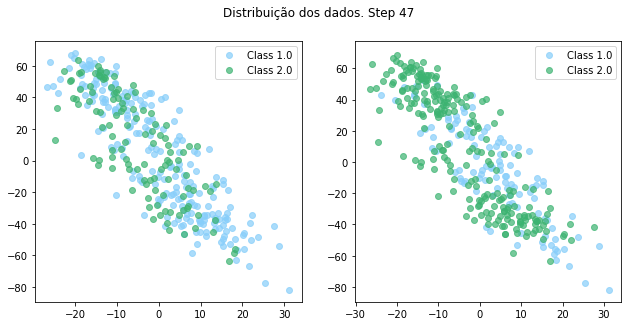

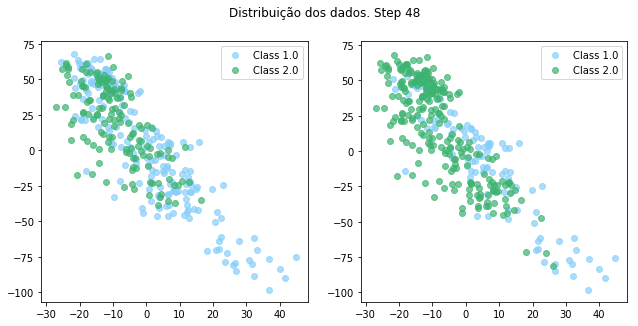

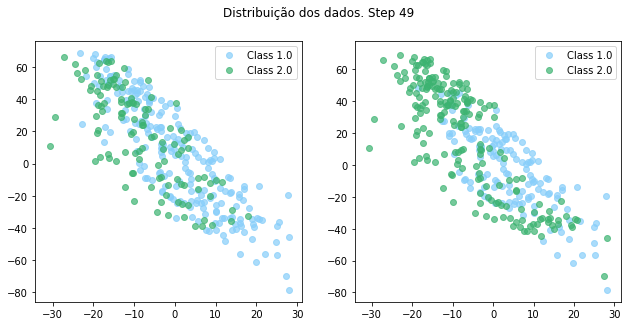

In [9]:
plots.plotPerBatches(stream, predicted, l_stream, len(stream), steps)